# 图例选择

启用图例上的选择功能以切换原始线条的显示和隐藏。

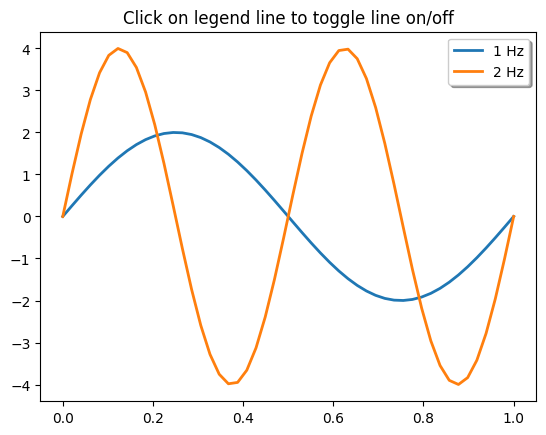

In [1]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1)
y1 = 2 * np.sin(2 * np.pi * t)
y2 = 4 * np.sin(2 * np.pi * 2 * t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
(line1, ) = ax.plot(t, y1, lw=2, label='1 Hz')
(line2, ) = ax.plot(t, y2, lw=2, label='2 Hz')
leg = ax.legend(fancybox=True, shadow=True)

lines = [line1, line2]
map_legend_to_ax = {}  # Will map legend lines to original lines.

pickradius = 5  # Points (Pt). How close the click needs to be to trigger an event.

for legend_line, ax_line in zip(leg.get_lines(), lines):
    legend_line.set_picker(pickradius)  # Enable picking on the legend line.
    map_legend_to_ax[legend_line] = ax_line


def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    legend_line = event.artist

    # Do nothing if the source of the event is not a legend line.
    if legend_line not in map_legend_to_ax:
        return

    ax_line = map_legend_to_ax[legend_line]
    visible = not ax_line.get_visible()
    ax_line.set_visible(visible)
    # Change the alpha on the line in the legend, so we can see what lines
    # have been toggled.
    legend_line.set_alpha(1.0 if visible else 0.2)
    fig.canvas.draw()


fig.canvas.mpl_connect('pick_event', on_pick)

# Works even if the legend is draggable. This is independent from picking legend lines.
leg.set_draggable(True)

plt.show()